단순 선형 회귀를 가지고 실제로 문제를 풀어보겠습니다. 어떤 학생이 공부 시간에 따라서 다음과 같은 점수를 얻었다는 데이터가 있습니다. 공부 시간이 x라면, 점수는 y입니다.

Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 필요한 사항들을 추가해갑니다. 첫번째 인자인 1은 출력의 차원을 의미하며, 두번째 인자인 input_dim은 입력의 차원을 정의하는데 이번 실습과 같이 1개의 실수 x를 가지고 하는 1개의 실수 y를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가집니다. 이제 직접 실습을 진행해보겠습니다.

In [1]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트

X=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
y=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 9 samples
Epoch 1/300
9/9 [==============================] - 1s 86ms/sample - loss: 392.2774 - mean_squared_error: 392.2774
Epoch 2/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.3217 - mean_squared_error: 2.3217
Epoch 3/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.3151 - mean_squared_error: 2.3151
Epoch 4/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.3088 - mean_squared_error: 2.3088
Epoch 5/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.3028 - mean_squared_error: 2.3028
Epoch 6/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.2971 - mean_squared_error: 2.2971
Epoch 7/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.2915 - mean_squared_error: 2.2915
Epoch 8/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.2862 - mean_squared_error: 2.2862
Epoch 9/300
9/9 [======

전체 데이터에 대한 훈련 횟수는 300으로 하였지만, 어느 순간 오차가 더 이상 줄어들지 않는데 이는 오차를 최소화하는 가중치 W와 b를 찾았기 때문으로 추정이 가능합니다. 이제 최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려보겠습니다.

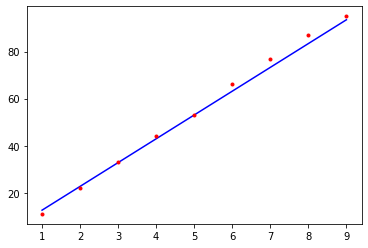

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'blue', X,y, 'r.')#X, model.predict(X), 'blue'


위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 직선은 실제값으로부터 오차를 최소화하는 W와 b의 값을 가지는 직선입니다. 이제 이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측하게 해봅시다. model.predict()은 학습이 완료된 모델이 입력된 데이터에 대해서 어떤 값을 예측하는지를 보여줍니다.

In [31]:
print(model.predict([9.5]))

[[98.55646]]


9시간 30분을 공부하면 약 98.5점을 얻는다고 예측하고 있습니다.